## Cel biznesowy
Naszym celem jest analiza zmiennej *History of Mental Illness* (czyli historii chorób psychicznych) 
w kontekście różnych czynników demograficznych, stylu życia i zdrowia. Chcemy zidentyfikować 
wzorce i potencjalne czynniki ryzyka, które mogą wpływać na występowanie problemów psychicznych.

### Depression Dataset
- Name: The full name of the individual.
- Age: The age of the individual in years.
-  Marital Status: The marital status of the individual. Possible values include Single, Married, Divorced, and Widowed.
-   Education Level: The highest level of education attained by the individual. Possible values include High School, Associate Degree, Bachelor's Degree, Master's Degree, and PhD.
-   Number of Children: The number of children the individual has.
-   Smoking Status: Indicates whether the individual is a smoker or not. Possible values are Smoker,Former and Non-smoker.
-   Physical Activity Level: The level of physical activity undertaken by the individual. Possible values include Sedentary, Moderate, and Active.
-   Employment Status: The employment status of the individual. Possible values include Employed and Unemployed.
-   Income: The annual income of the individual in USD.
-   Alcohol Consumption: The level of alcohol consumption. Possible values include Low, Moderate, and High.
-   Dietary Habits: The dietary habits of the individual. Possible values include Healthy, Moderate, and Unhealthy.
-   Sleep Patterns: The quality of sleep. Possible values include Good, Fair, and Poor.
-   History of Mental Illness: Whether the individual has a history of mental illness. Possible values are Yes and No.
-   History of Substance Abuse: Whether the individual has a history of substance abuse. Possible values are Yes and No.
-   Family History of Depression: Indicates if there is a family history of depression. Possible values are Yes and No.
-   Chronic Medical Conditions: Whether the individual has chronic medical conditions. Possible values are Yes and No.

### Podział zmiennych
- **Zmienne objaśniające:** "Age", "Marital Status", "Education Level", "Number of Children", "Smoking Status", 
    "Physical Activity Level", "Employment Status", "Income", "Alcohol Consumption", 
    "Dietary Habits", "Sleep Patterns", "History of Substance Abuse", 
    "Family History of Depression", "Chronic Medical Conditions"
- **Zmienna objaśniana:** "History of Mental Illness"

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("C:/Users/eliss/OneDrive/Documents/Semestr 4/Wstęp do uczenia maszynowego/ML_projekt1_dane/depression_data.csv")
# df = pd.read_csv("/Users/oliwi/OneDrive/Pulpit/ML_laboratorium/Projekt1/depression_data.csv")
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [47]:
#usuwamy pierwsza kolumne z imionami/nazwiskami, bo nie chcemy, zeby model wiazal np. imie Adam z posiadaniem depresji

df = df.drop(columns="Name")

df.info() #413768 wierszow bez nulli
len(df) #liczba wierszy = 413768, czyli nie ma wierszy z brakujacymi informacjami

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  object 
 2   Education Level               413768 non-null  object 
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  object 
 5   Physical Activity Level       413768 non-null  object 
 6   Employment Status             413768 non-null  object 
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  object 
 9   Dietary Habits                413768 non-null  object 
 10  Sleep Patterns                413768 non-null  object 
 11  History of Mental Illness     413768 non-null  object 
 12  History of Substance Abuse    413768 non-nul

413768

Procentowy rozkład odpowiedzi w kolumnie 'History of Mental Illness':
History of Mental Illness
No     69.590447
Yes    30.409553
Name: count, dtype: float64


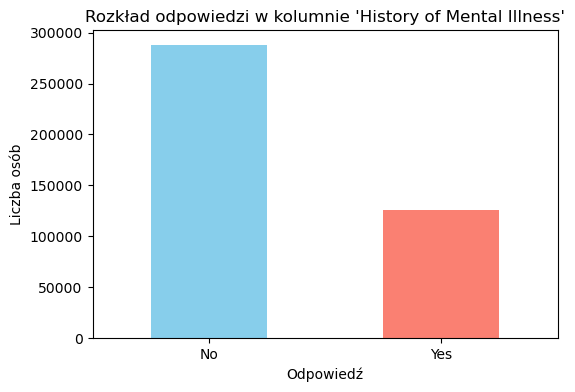

In [48]:
#sprawdzamy czy ramka danych jest zbalansowana 
mental_health_counts = df["History of Mental Illness"].value_counts()
mental_health_percentage = mental_health_counts / len(df) * 100

print("Procentowy rozkład odpowiedzi w kolumnie 'History of Mental Illness':")
print(mental_health_percentage)

plt.figure(figsize=(6, 4))
mental_health_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Rozkład odpowiedzi w kolumnie 'History of Mental Illness'")
plt.xlabel("Odpowiedź")
plt.ylabel("Liczba osób")
plt.xticks(rotation=0)
plt.show()
#ramka jest zbalansowana

Średnia wieku: 49, Mediana wieku: 49, Odchylenie standardowe wieku: 18
Średnia liczby dzieci: 1, Mediana liczby dzieci: 1, Odchylenie standardowe liczby dzieci: 1
Średni dochód: 50662, Mediana dochodu: 37520, Odchylenie standardowe dochodu: 40624


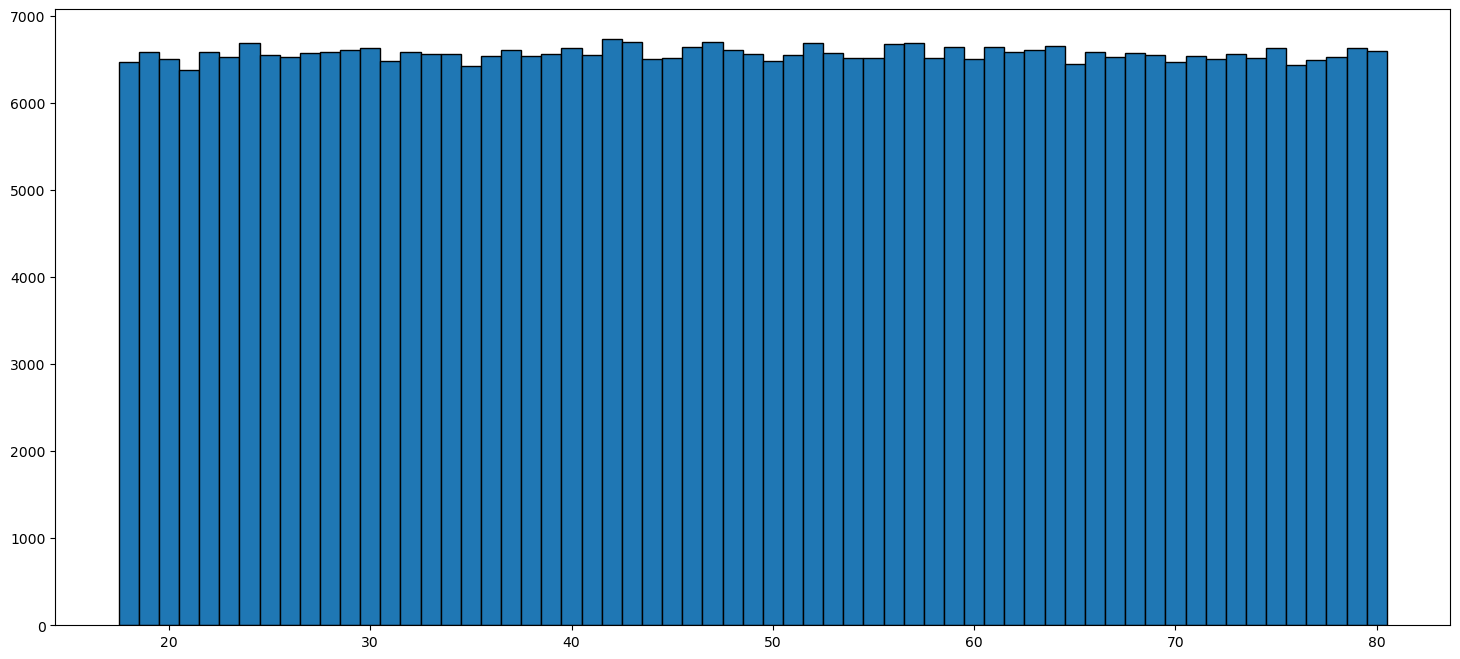

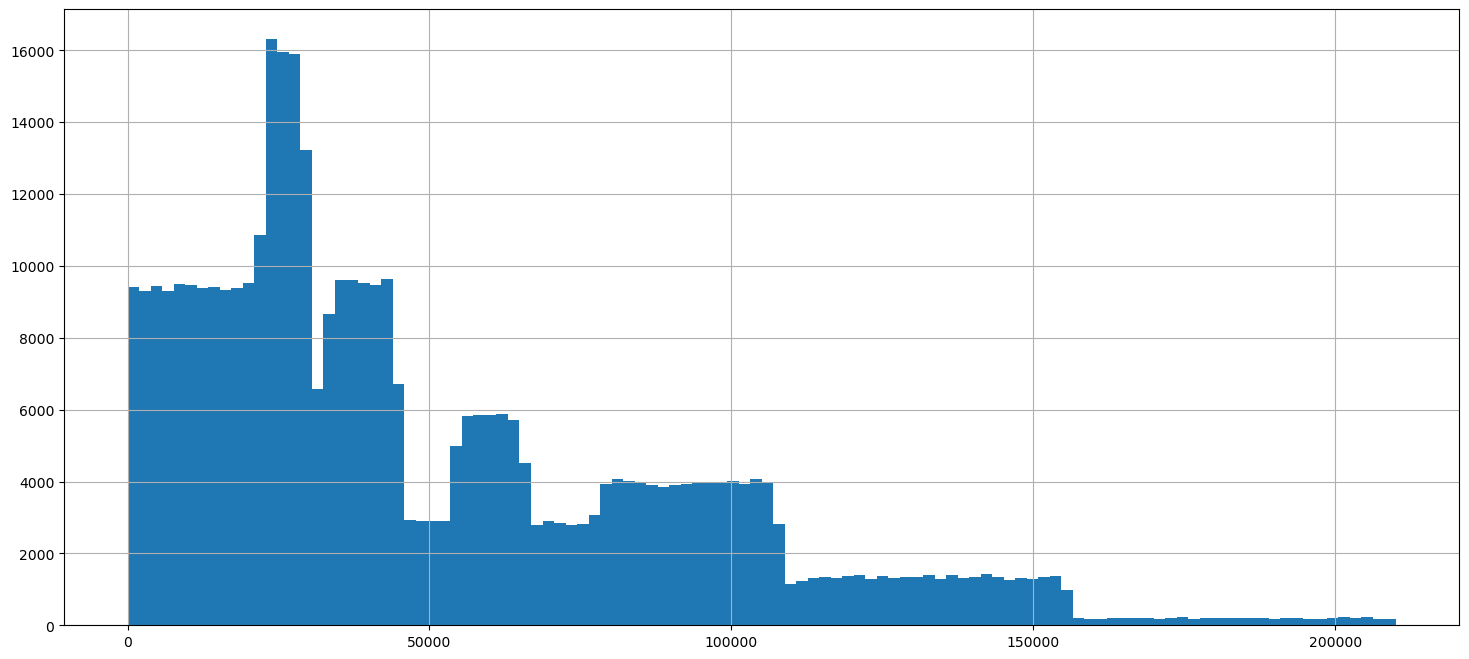

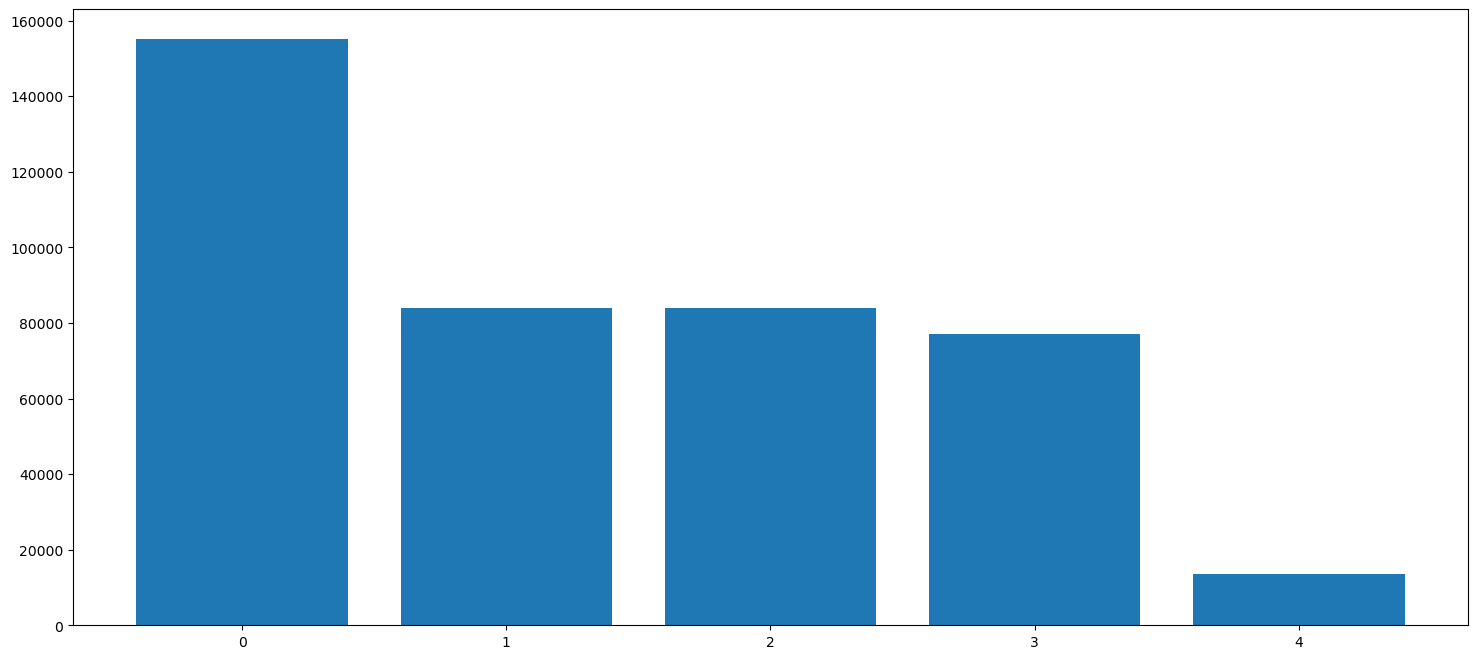

In [49]:
# ZMIENNE NUMERYCZNE

# srednia
mean_age = df['Age'].mean()
mean_children = df['Number of Children'].mean()
mean_income = df['Income'].mean()

# mediana
median_age = df['Age'].median()
median_children = df['Number of Children'].median()
median_income = df['Income'].median()

# odchylenie standardowe
std_age = df['Age'].std()
std_children = df['Number of Children'].std()
std_income = df['Income'].std()

print(f"Średnia wieku: {round(mean_age)}, Mediana wieku: {round(median_age)}, Odchylenie standardowe wieku: {round(std_age)}")
print(f"Średnia liczby dzieci: {round(mean_children)}, Mediana liczby dzieci: {round(median_children)}, Odchylenie standardowe liczby dzieci: {round(std_children)}")
print(f"Średni dochód: {round(mean_income)}, Mediana dochodu: {round(median_income)}, Odchylenie standardowe dochodu: {round(std_income)}")

# hipoteza co do dochodu: skoro mediana i srednia sa od siebie az tak oddalone, to moze to oznaczac ze sa obserwacje zaburzajace dane

# histogramy:
plt.figure(figsize=(18, 8))
plt.hist(df["Age"], bins=range(int(df["Age"].min()), int(df["Age"].max()) + 2), edgecolor='black', align='left')
plt.show()

df["Income"].hist(bins=110, figsize=(18, 8)) #rozklad unimodalny, prawoskosny - potwierdzenie naszych podejrzen
plt.show()
child_count = df["Number of Children"].value_counts().sort_index()



# Tworzymy wykres słupkowy dla liczby dzieci
plt.figure(figsize=(18, 8))
plt.bar(child_count.index, child_count.values)#rowniez rozklad unimodalny, ludzi z 4 dziecmi jest najmniej, z 0 najwiecej
plt.show()


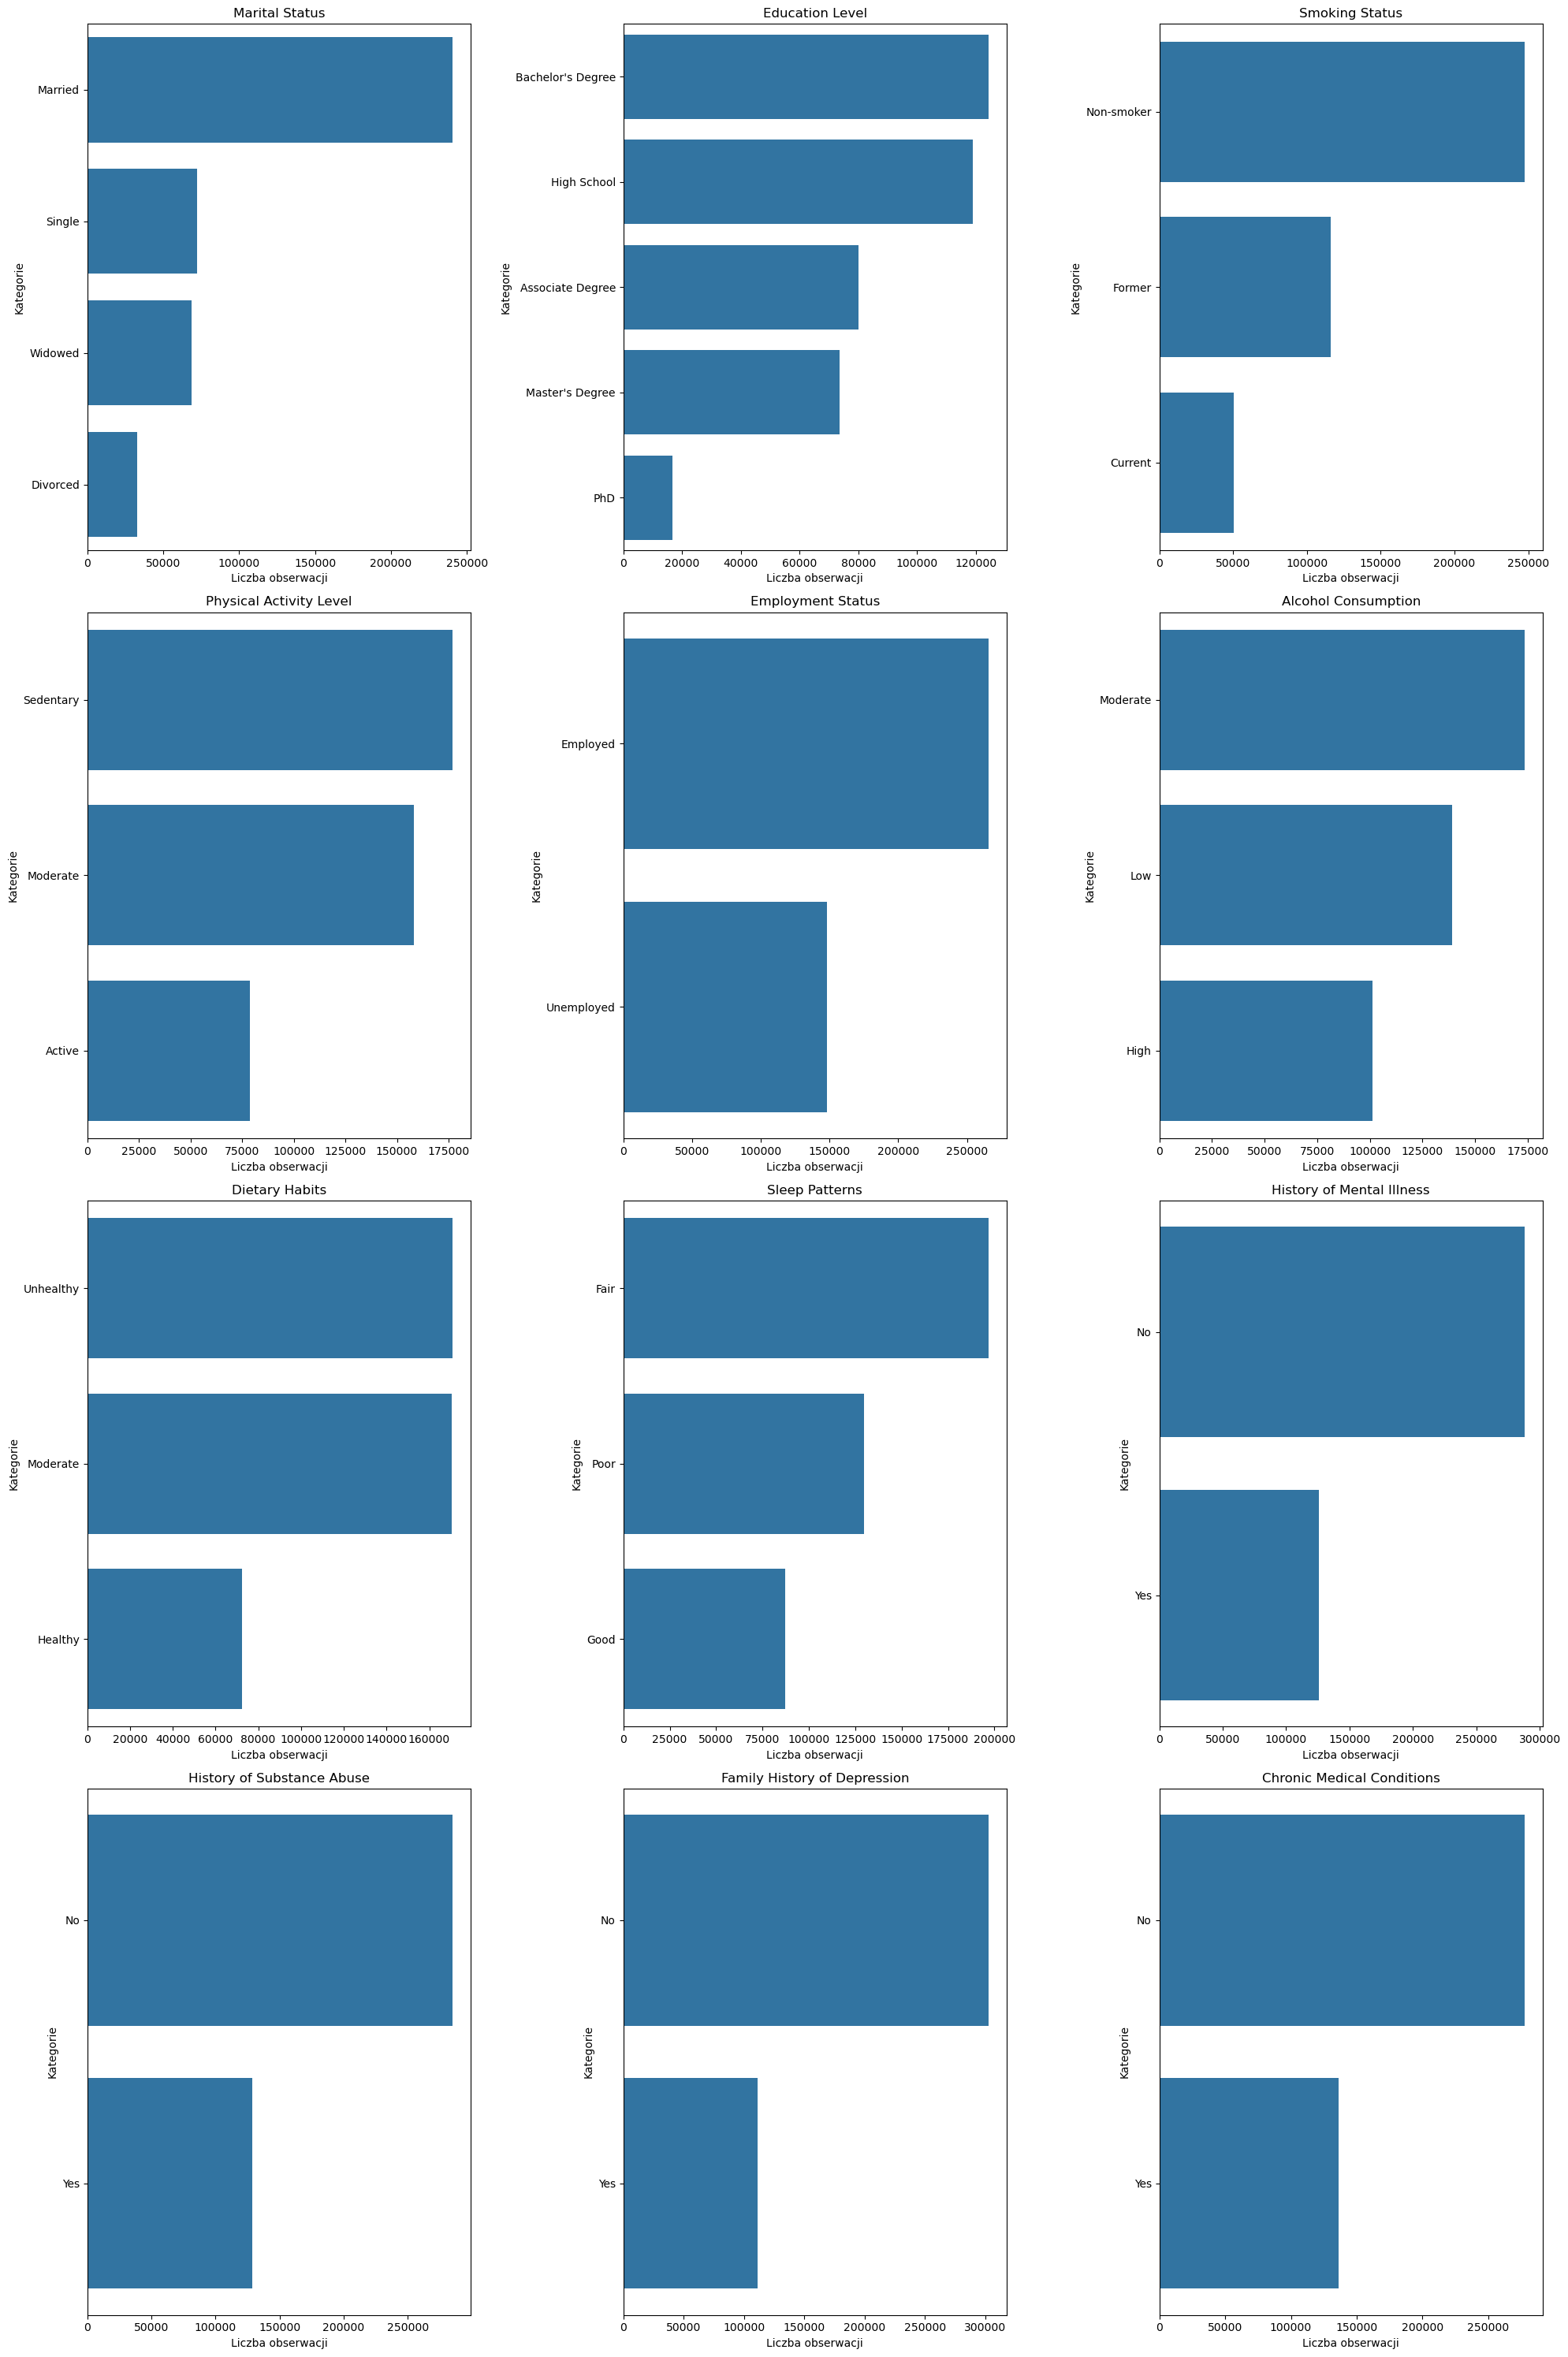

In [50]:
# ZMIENNE KATEGORYCZNE

# sprawdzimy czestosc wystepowania poszczegolnych kategorii w obrebie kolumny

nazwy_kolumn = ['Marital Status', 'Education Level', 'Smoking Status', 
                        'Physical Activity Level', 'Employment Status', 
                        'Alcohol Consumption', 'Dietary Habits', 
                        'Sleep Patterns', 'History of Mental Illness', 
                        'History of Substance Abuse', 'Family History of Depression', 
                        'Chronic Medical Conditions']

plt.figure(figsize=(20, 30))

for i, kolumna in enumerate(nazwy_kolumn, 1):
    plt.subplot(4, 3, i) 
    sns.countplot(y=df[kolumna], order=df[kolumna].value_counts().index)
    plt.title(f'{kolumna}')
    plt.xlabel('Liczba obserwacji')
    plt.ylabel('Kategorie')

plt.tight_layout()
plt.show()

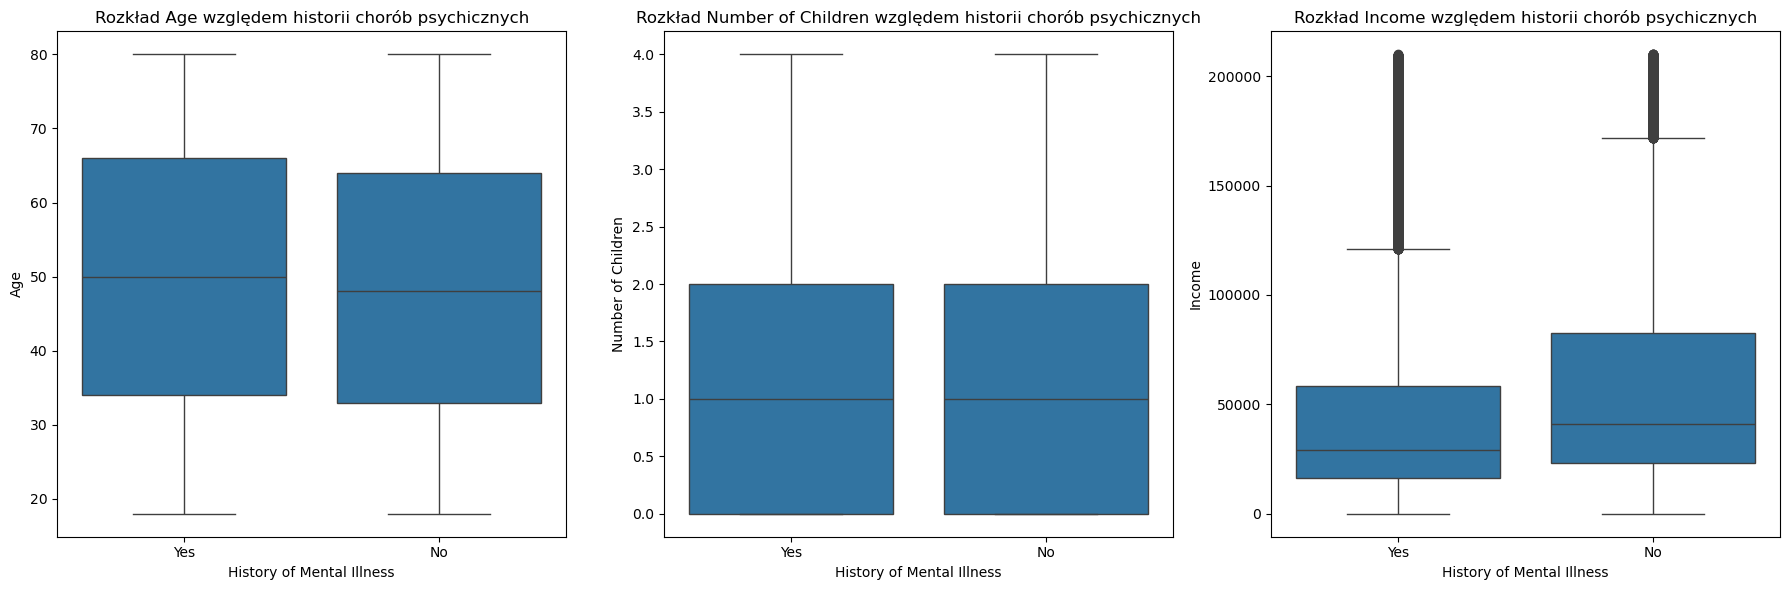

Rozkład dla Marital Status:
History of Mental Illness      No    Yes
Marital Status                          
Divorced                    23111   9618
Married                    167155  73289
Single                      50690  21420
Widowed                     46987  21498


Rozkład dla Education Level:
History of Mental Illness     No    Yes
Education Level                        
Associate Degree           53324  26675
Bachelor's Degree          89845  34484
High School                79583  39344
Master's Degree            53111  20657
PhD                        12080   4665


Rozkład dla Smoking Status:
History of Mental Illness      No    Yes
Smoking Status                          
Current                     35174  14994
Former                      81031  35153
Non-smoker                 171738  75678


Rozkład dla Physical Activity Level:
History of Mental Illness      No    Yes
Physical Activity Level                 
Active                      55424  23481
Moderate          

In [51]:
#  eksploracja rozkładów zmiennych względem etykiety docelowej

grouped = df.groupby('History of Mental Illness')

numeryczne_kolumny = ['Age', 'Number of Children', 'Income']

plt.figure(figsize=(18, 6))
for i, kolumna in enumerate(numeryczne_kolumny, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='History of Mental Illness', y=kolumna, data=df)
    plt.title(f'Rozkład {kolumna} względem historii chorób psychicznych')
plt.tight_layout()
plt.show()

kategoryczne_kolumny = ['Marital Status', 'Education Level', 'Smoking Status', 
                        'Physical Activity Level', 'Employment Status', 
                        'Alcohol Consumption', 'Dietary Habits', 
                        'Sleep Patterns', 'History of Substance Abuse', 
                        'Family History of Depression', 'Chronic Medical Conditions']



for col in kategoryczne_kolumny:
    print(f"Rozkład dla {col}:")
    print(pd.crosstab(df[col], df['History of Mental Illness']))
    print("\n")


In [52]:
# Analiza wartości odstających
#Tworzenie nowych kolumn - income group, w ktorej income jest podzielony na przedzialy co 1000

#ZMIENNE NUMERYCZNE - na podstawie histogramu i barplota
print('Usuwanie outlierów w kolumnie Income')

bins = range(0, int(df['Income'].max()) + 1000, 1000)  # Przedziały co 1000
labels = [f'{x}-{x+999.99}' for x in bins[:-1]]  # Tworzymy etykiety przed
df['Income Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)
income_group_counts = df['Income Group'].value_counts().sort_index()
filtered_income_groups = income_group_counts[income_group_counts < 500].index
input_size = df.shape[0]
df_filtered = df[~df['Income Group'].isin(filtered_income_groups)]
output_size = df_filtered.shape[0]
removed_rows = input_size - output_size

print(f'Wejściowy rozmiar ramki danych: {input_size} wierszy')
print(f'Wyjściowy rozmiar ramki danych: {output_size} wierszy')
print(f'Liczba usuniętych wierszy: {removed_rows} wierszy')

print("Przedziały dochodów, gdzie liczba wystąpień jest mniejsza niż 1000:")
print(income_group_counts[income_group_counts < 500])


#ZMIENNE KATEGORYCZNE
exclude_columns = ["Age", "Income", "Number of Children"]
print()
print('Analiza outlierów w kolumnach kategorycznych')
# Iteracja przez każdą kolumnę, z wyjątkiem podanych, i wyświetlenie liczby wystąpień poszczególnych kategorii raz procentowego udziału każdej kategorii w całej kolumnie
for col in df.columns:
    if col not in exclude_columns:
        print(f"Kolumna: {col}")
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(normalize=True, dropna=False) * 100
        result = pd.concat([counts, percentages], axis=1, keys=["Liczba", "Procent"])
        print(result)
        print("-" * 40)



Usuwanie outlierów w kolumnie Income
Wejściowy rozmiar ramki danych: 413768 wierszy
Wyjściowy rozmiar ramki danych: 408193 wierszy
Liczba usuniętych wierszy: 5575 wierszy
Przedziały dochodów, gdzie liczba wystąpień jest mniejsza niż 1000:
Income Group
156000-156999.99    111
157000-157999.99     98
158000-158999.99    107
159000-159999.99    101
160000-160999.99     93
161000-161999.99     94
162000-162999.99    108
163000-163999.99    109
164000-164999.99    105
165000-165999.99    103
166000-166999.99    124
167000-167999.99     98
168000-168999.99    109
169000-169999.99    110
170000-170999.99     97
171000-171999.99     83
172000-172999.99     98
173000-173999.99    124
174000-174999.99    105
175000-175999.99    104
176000-176999.99    106
177000-177999.99     98
178000-178999.99    109
179000-179999.99    100
180000-180999.99    106
181000-181999.99     92
182000-182999.99    108
183000-183999.99    104
184000-184999.99    117
185000-185999.99     99
186000-186999.99    106
1870

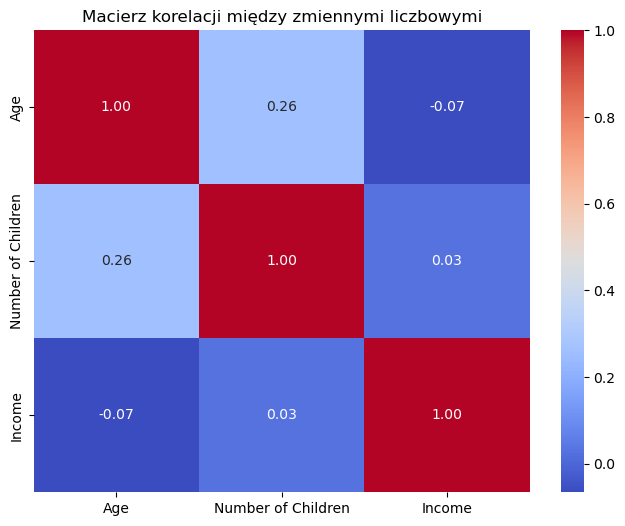

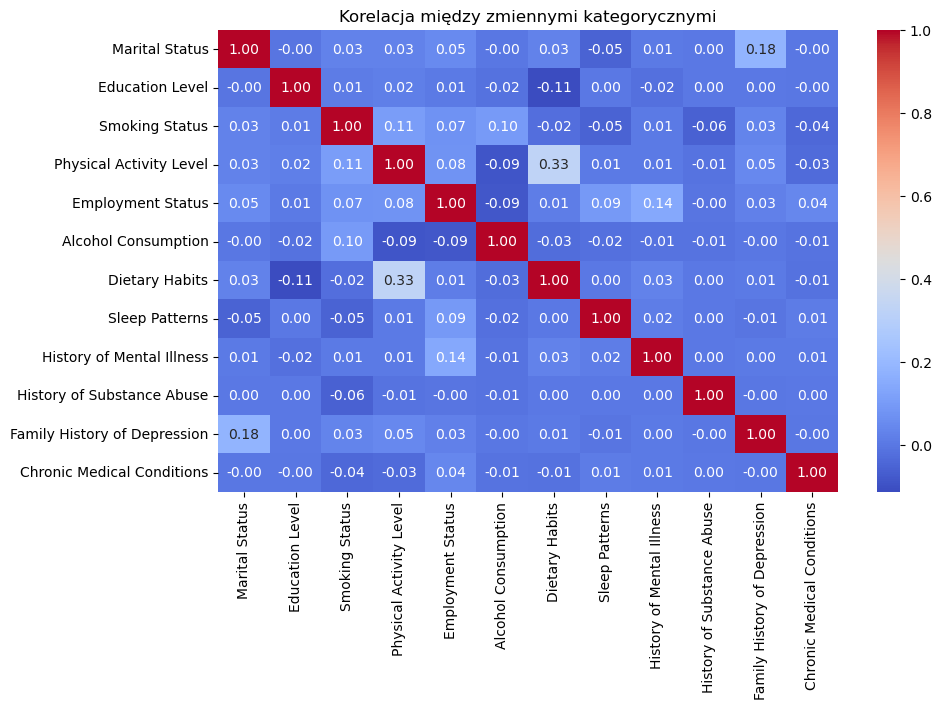

In [53]:
#Korelacje między zmiennymi

# Analiza korelacji dla zmiennych numerycznych
numeric_cols = df.select_dtypes(include=["number"])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji między zmiennymi liczbowymi")
plt.show()

# Analiza korelacji dla zmiennych kategorycznych
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
if categorical_cols:
    plt.figure(figsize=(10, 6))
    corr_categorical = df[categorical_cols].apply(lambda x: x.astype("category").cat.codes)
    sns.heatmap(corr_categorical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Korelacja między zmiennymi kategorycznymi")
    plt.show()


In [54]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Income Group
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,26000-26999.99
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,42000-42999.99
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,125000-125999.99
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,9000-9999.99
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,8000-8999.99


In [55]:
#Zamiana zmiennych kategorycznych na numeryczne 

# ordinal encoding - skala

activity_mapping = {
    "Sedentary": 0,
    "Moderate": 1,
    "Active": 2,
}
if "Physical Activity Level" in df.columns:
    df["Physical Activity Level"] = df["Physical Activity Level"].map(activity_mapping)

alcohol_mapping = {
    "Low": 0,
    "Moderate": 1,
    "High": 2,
}
if "Alcohol Consumption" in df.columns:
    df["Alcohol Consumption"] = df["Alcohol Consumption"].map(alcohol_mapping)


dietary_mapping = {
    "Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2,
}
if "Dietary Habits" in df.columns:
    df["Dietary Habits"] = df["Dietary Habits"].map(dietary_mapping)

sleep_mapping = {
    "Poor": 0,
    "Fair": 1,
    "Good": 2,
}
if "Sleep Patterns" in df.columns:
    df["Sleep Patterns"] = df["Sleep Patterns"].map(sleep_mapping)

#one hot encoding - 0,1
binary_cols = [
    "History of Substance Abuse",
    "History of Mental Illness",
    "Family History of Depression",
    "Chronic Medical Conditions"
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().map({"Yes": 1, "No": 0})

employment_mapping = {
    "Unemployed": 0,
    "Employed": 1
}
if "Employment Status" in df.columns:
    df["Employment Status"] = df["Employment Status"].map(employment_mapping)

education_mapping = {
    "High School": 0,
    "Associate Degree": 1,
    "Bachelor's Degree": 1,
    "Master's Degree": 1,
    "PhD": 1
}
if "Education Level" in df.columns:
    df["Education Level"] = df["Education Level"].map(education_mapping)    


df["Married"] = (df["Marital Status"] == "Married").astype(int)
df["Single"] = (df["Marital Status"] == "Single").astype(int)
df["Widowed"] = (df["Marital Status"] == "Widowed").astype(int)
df.drop(columns=["Marital Status"], inplace=True)

df["Non-smoker"] = (df["Smoking Status"] == "Non-smoker").astype(int)
df["Former"] = (df["Smoking Status"] == "Former").astype(int)
df["Current"] = (df["Smoking Status"] == "Current").astype(int)
df.drop(columns=["Smoking Status"], inplace=True)

# smoking_mapping = {
#     "Non-smoker": 0,
#     "Former": 1,
#     "Current": 2
# }
# if "Smoking Status" in df.columns:
#     df["Smoking Status"] = df["Smoking Status"].map(smoking_mapping)

df.head()




,Age,Education Level,Number of Children,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Income Group,Married,Single,Widowed,Non-smoker,Former,Current
0,31,1,2,2,0,26265.67,1,1,1,1,0,1,1,26000-26999.99,1,0,0,1,0,0
1,55,0,1,0,1,42710.36,2,0,1,1,0,0,1,42000-42999.99,1,0,0,1,0,0
2,78,1,1,0,1,125332.79,0,0,2,0,0,1,0,125000-125999.99,0,0,1,1,0,0
3,58,1,3,1,0,9992.78,1,1,0,0,0,0,0,9000-9999.99,0,0,0,1,0,0
4,18,0,0,0,0,8595.08,0,1,1,1,0,1,1,8000-8999.99,0,1,0,1,0,0


In [56]:
from sklearn.preprocessing import MinMaxScaler
#wiek - podzial na grupy 0-18, 19-30, 31-40, 41-50, 51-60, 61-70, 71-90 
bins = [0, 18, 30, 40, 50, 60, 70, 90]
labels = [0, 1, 2, 3, 4, 5, 6] 
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age Group'] = df['Age Group'].astype(int)

#Normalizacja zmiennej Age - bo byl rozklad jednostajny
scaler = MinMaxScaler()
df['Age Group Normalized'] = scaler.fit_transform(df[['Age Group']])
df.drop(columns=["Age Group"], inplace=True)
df.drop(columns=["Age"], inplace=True)
df.head()

,Education Level,Number of Children,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Income Group,Married,Single,Widowed,Non-smoker,Former,Current,Age Group Normalized
0,1,2,2,0,26265.67,1,1,1,1,0,1,1,26000-26999.99,1,0,0,1,0,0,0.2
1,0,1,0,1,42710.36,2,0,1,1,0,0,1,42000-42999.99,1,0,0,1,0,0,0.6
2,1,1,0,1,125332.79,0,0,2,0,0,1,0,125000-125999.99,0,0,1,1,0,0,1.0
3,1,3,1,0,9992.78,1,1,0,0,0,0,0,9000-9999.99,0,0,0,1,0,0,0.6
4,0,0,0,0,8595.08,0,1,1,1,0,1,1,8000-8999.99,0,1,0,1,0,0,0.0


,Education Level,Number of Children,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Married,Single,Widowed,Non-smoker,Former,Current,Age Group Normalized,Income_scaled
0,1,2,2,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0.2,-0.213319
1,0,1,0,1,2,0,1,1,0,0,1,1,0,0,1,0,0,0.6,0.228157
2,1,1,0,1,0,0,2,0,0,1,0,0,0,1,1,0,0,1.0,1.205719
3,1,3,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0.6,-1.090830
4,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0.0,-1.227638


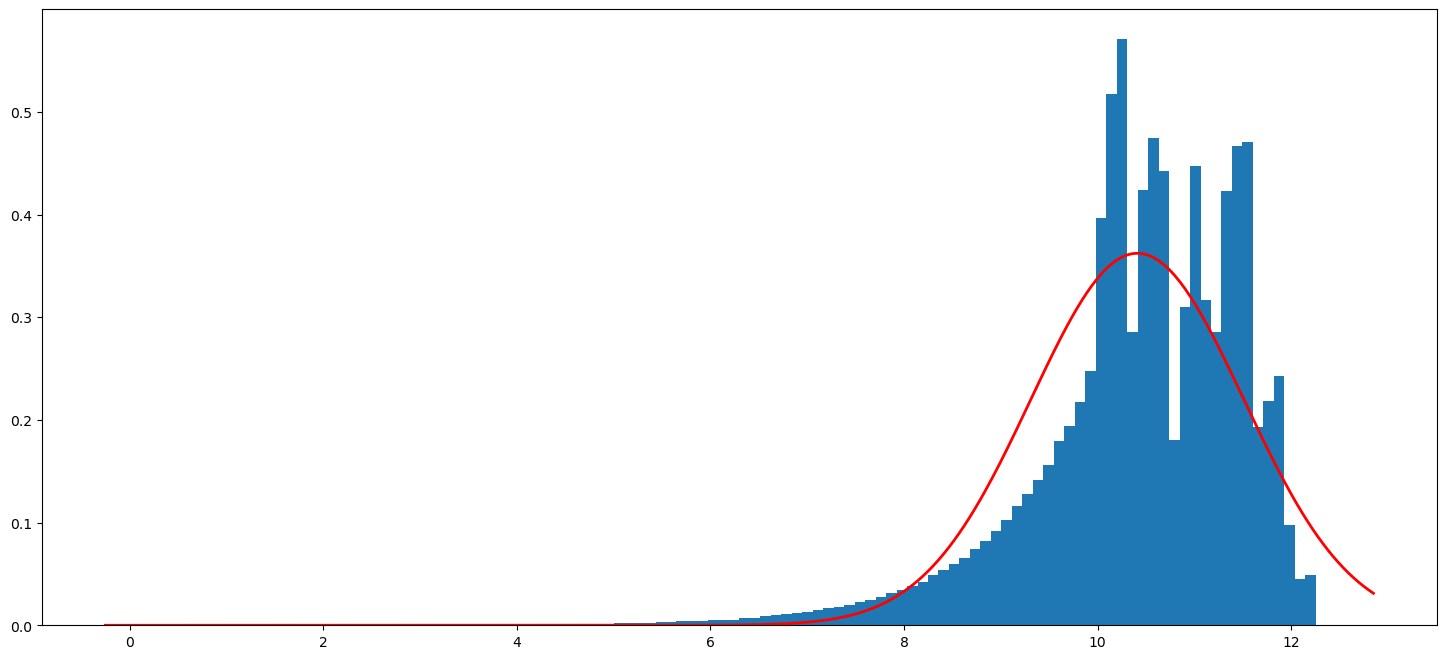

In [57]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
# Logarytmiczne przekształcenie dochodu (log1p = log(1 + x), bezpieczne dla zera), bo histogram byl prawoskosny
data = np.log1p(df['Income'])
mu, std = data.mean(), data.std()
plt.figure(figsize=(18, 8))
plt.hist(data, bins=110, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 500)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Krzywa Gaussa')


# Standaryzacja przekształconego dochodu
scaler = StandardScaler()
df['Income_scaled'] = scaler.fit_transform(data.values.reshape(-1, 1))
df.drop(columns=["Income"], inplace=True)
df.drop(columns=["Income Group"], inplace=True)

df.head()


In [58]:
df["Nutrition Habits"] = df["Alcohol Consumption"] + df["Dietary Habits"]
df["Activity"] = df["Physical Activity Level"] + df["Sleep Patterns"]
df["Substance abuse"] = df["History of Substance Abuse"] + df["Alcohol Consumption"] + df["Non-smoker"] + df["Former"] + df["Current"]

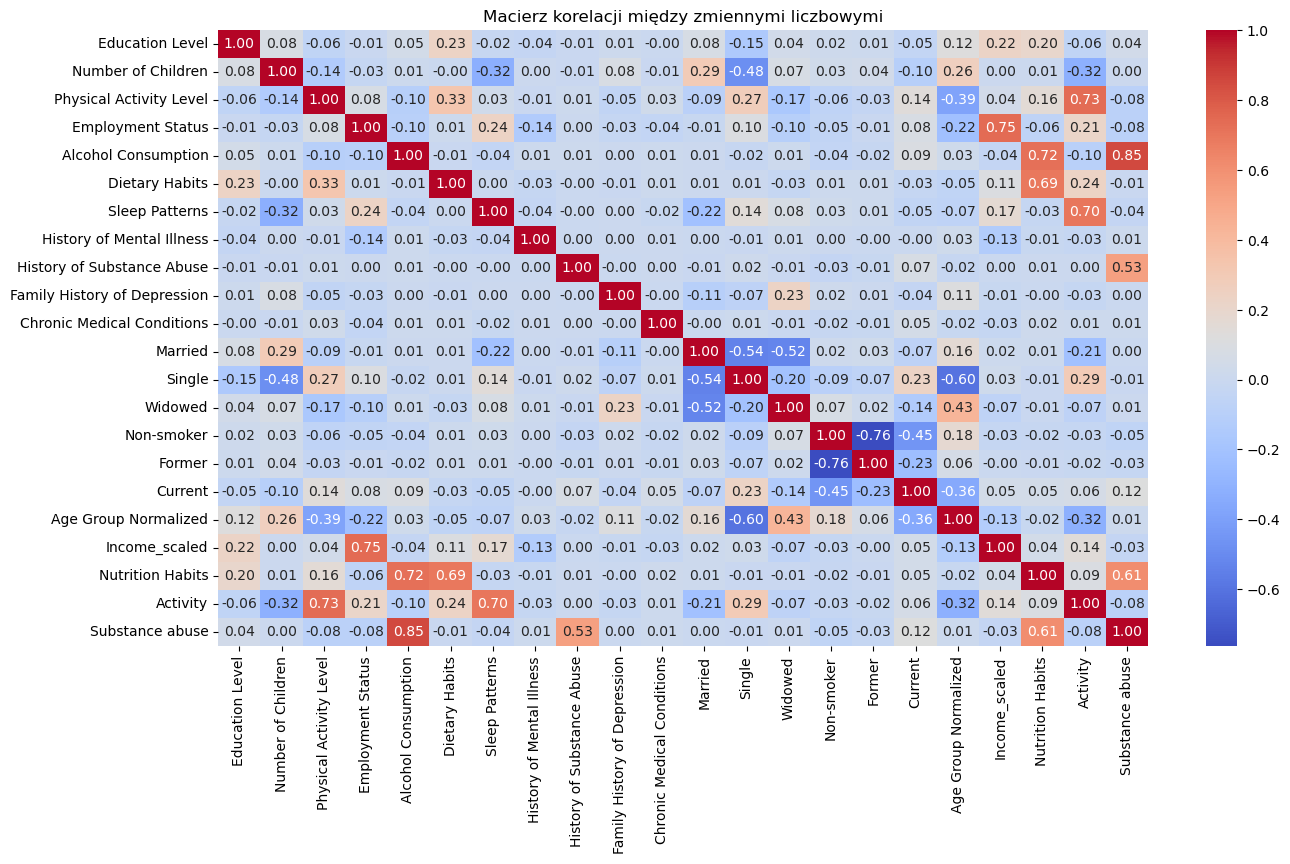

In [59]:
# Analiza korelacji dla zmiennych numerycznych
numeric_cols = df.select_dtypes(include=["number"])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji między zmiennymi liczbowymi")
plt.show()


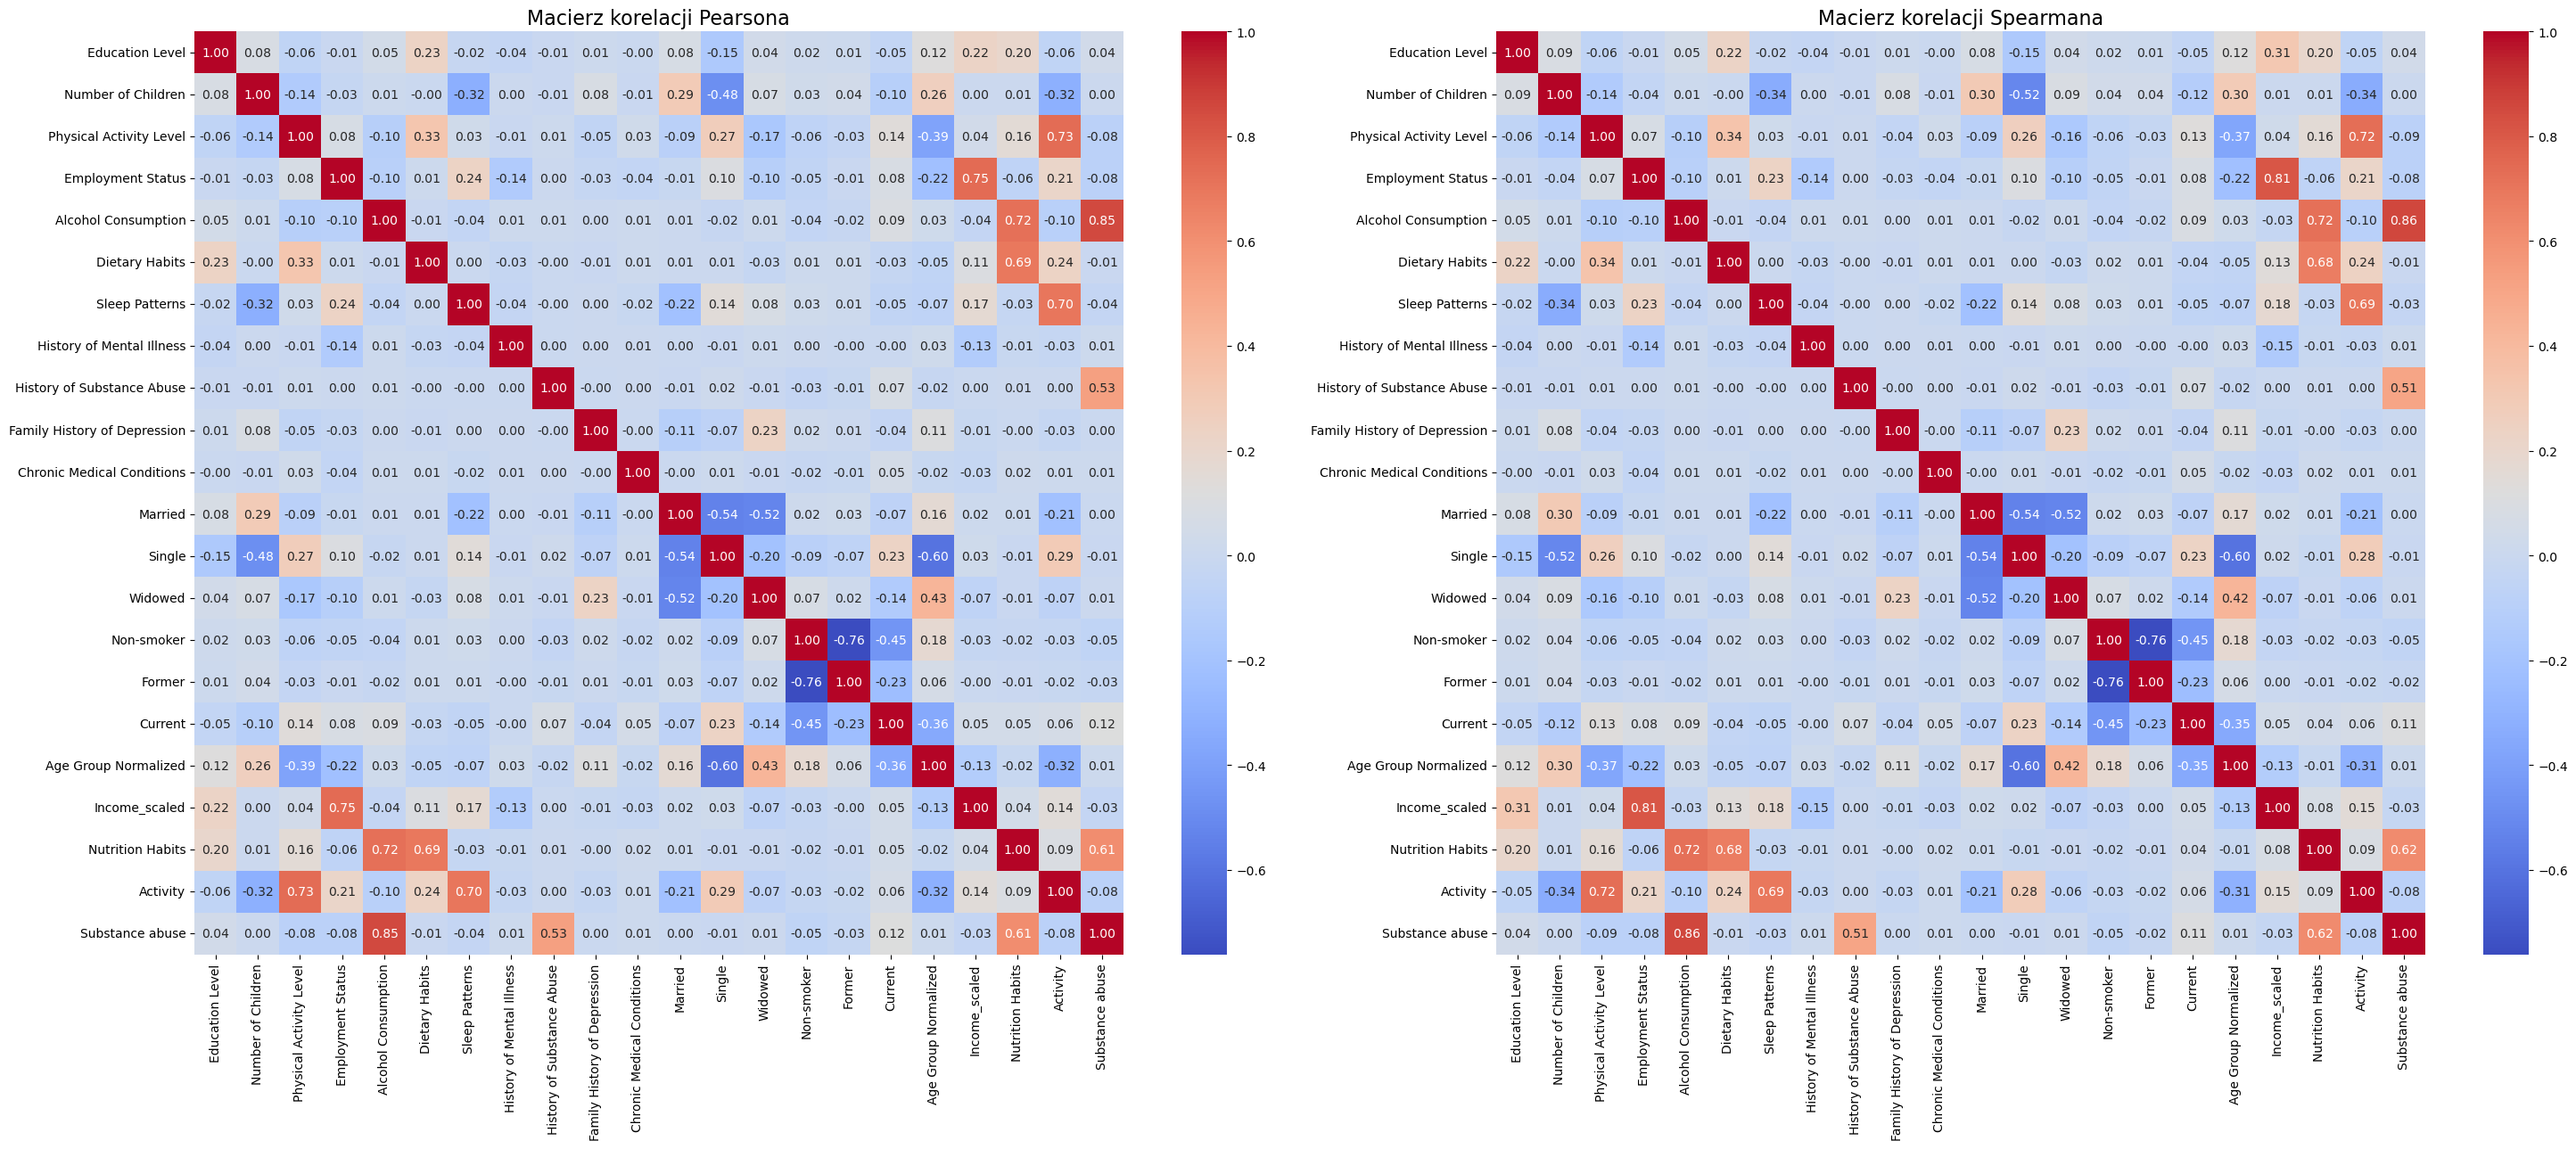

In [60]:
#korelacje
pearson_corr = df.corr(method="pearson")
spearman_corr = df.corr(method="spearman")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 13))

# Heatmapa korelacji Pearsona - liniowa zaleznosc miedzy zmiennymi
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', ax=ax1, fmt='.2f', cbar=True)
ax1.set_title("Macierz korelacji Pearsona", fontsize=16)

# Heatmapa korelacji Spearmana - monotoniczna zaleznosc miedzy zmiennymi
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', ax=ax2, fmt='.2f', cbar=True)
ax2.set_title("Macierz korelacji Spearmana", fontsize=16)

# Wyświetlanie wykresu
plt.tight_layout()
plt.show()

In [61]:
import copy
df2 = copy.deepcopy(df)

In [62]:
#podzial na zbior testowy(20%) i treningowy(80%)
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['History of Mental Illness'])
y = df2['History of Mental Illness']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y,train, y_val = train

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

val_df = X_val.copy()
val_df['target'] = y_val  # jeśli Twoja kolumna celu to np. 'popularity_class' albo coś podobnego

val_df.to_csv('validation_set.csv', index=False)

In [63]:
#REGRESJA LOGISTYCZNA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Trenowanie modelu
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predykcje na zbiorze testowym
y_pred = logreg.predict(X_test)

# Ocena modelu
print("Regresja logistyczna:")
print("Dokładność:", accuracy_score(y_test, y_pred))
print("Precyzja:", precision_score(y_test, y_pred))
print("Czułość:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

#Regresja logistyczna w obecnej formie nie radzi sobie dobrze z niezbalansowanymi danymi. 
#Model jest "zdominowany" przez klasę większościową (0) i ignoruje klasę mniejszościową (1).

Regresja logistyczna:
Dokładność: 0.6957730139932813
Precyzja: 0.21052631578947367
Czułość: 0.00015895092390224517
F1-score: 0.0003176620076238882


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Parametr class_weight='balanced' automatycznie przypisuje wagi klasom odwrotnie proporcjonalne do ich liczebności
#co pomaga modelowi lepiej rozpoznawać klasę mniejszościową.

# Trenowanie modelu z wagami klas
logreg_balanced = LogisticRegression(random_state=42, class_weight='balanced')
logreg_balanced.fit(X_train, y_train)

# Predykcje
y_pred_balanced = logreg_balanced.predict(X_test)

# Ocena
print("Regresja logistyczna (z wagami klas):")
print("Dokładność:", accuracy_score(y_test, y_pred_balanced))
print("Precyzja:", precision_score(y_test, y_pred_balanced))
print("Czułość:", recall_score(y_test, y_pred_balanced))
print("F1-score:", f1_score(y_test, y_pred_balanced))

#1. Poprawa w rozpoznawaniu klasy mniejszościowej
#Zastosowanie class_weight='balanced' pomogło modelowi lepiej rozpoznawać klasę mniejszościową (1). 
# #Wcześniej czułość wynosiła tylko 0.06%, co oznaczało, że model praktycznie ignorował klasę 1. 
# #Teraz czułość wzrosła do 46.4%, co jest dużym krokiem naprzód. Model zaczął "zauważać" przypadki z historią choroby psychicznej, choć wciąż nie jest idealny.

#2. Spadek dokładności
#Spadek dokładności z 69.4% do 61.5% jest spodziewany i nie jest problemem. 
# #Wcześniej model osiągał wysoką dokładność, ponieważ przewidywał głównie klasę 0 (dominującą). 
# #Teraz, gdy model lepiej rozpoznaje klasę 1, popełnia więcej błędów w przewidywaniu klasy 0, co obniża ogólną dokładność. 

Regresja logistyczna (z wagami klas):
Dokładność: 0.6138434395920439
Precyzja: 0.38660878276840877
Czułość: 0.46004371150407314
F1-score: 0.42014153511159497


Dla badanej kolumny klasa 1 ("yes") stanowi 30% danych, a klasa 0 ("no") 70%. Nawet przy umiarkowanym niezbalansie, metryki takie jak dokładność (accuracy) mogą być mylące. F1-score jest bardziej odpowiedni, ponieważ jest to harmoniczna średnia precyzji i czułości. Uwzględnia zarówno precyzję (jak wiele przewidzianych przypadków klasy 1 jest poprawnych), jak i czułość (jak wiele rzeczywistych przypadków klasy 1 model wykrył). Jest szczególnie przydatny w przypadku niezbalansowanych danych, ponieważ kładzie nacisk na klasę mniejszościową 

In [28]:
from sklearn.model_selection import GridSearchCV

# Definicja siatki hiperparametrów
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_logreg = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'), param_grid, cv=5, scoring='f1')
grid_logreg.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_logreg.best_params_)
print("Najlepszy F1-score (CV):", grid_logreg.best_score_)

# Ocena na zbiorze testowym z najlepszym modelem
best_logreg = grid_logreg.best_estimator_
y_pred_best = best_logreg.predict(X_test)
print("Najlepszy model na zbiorze testowym:")
print("Dokładność:", accuracy_score(y_test, y_pred_best))
print("Precyzja:", precision_score(y_test, y_pred_best))
print("Czułość:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))

# Stabilność modelu: 
# Wyniki po Grid Search są niemal identyczne jak wcześniej, co oznacza, że model jest stabilny i nie wymagał dużego dostrajania hiperparametrów. 
# To dobry znak – oznacza, że regresja logistyczna z class_weight='balanced' działa dobrze w obecnej formie.

# Wyniki wciąż pokazują, że model ma trudności z klasą mniejszościową (czułość 46.4% oznacza, że ponad połowa przypadków klasy 1 jest pomijana). 
# Można próbować dalszych technik lub zobaczymy, jak inne modele radzą sobie z tym problemem.

Najlepsze parametry: {'C': 1, 'solver': 'lbfgs'}
Najlepszy F1-score (CV): 0.42537118635818755
Najlepszy model na zbiorze testowym:
Dokładność: 0.6138434395920439
Precyzja: 0.38660878276840877
Czułość: 0.46004371150407314
F1-score: 0.42014153511159497


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Model regresji logistycznej z najlepszymi parametrami
model_lr = LogisticRegression(
    C=1,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

# Walidacja krzyżowa (3 foldy)
scores_f1_lr = cross_val_score(model_lr, X, y, cv=3, scoring='f1')
scores_accuracy_lr = cross_val_score(model_lr, X, y, cv=3, scoring='accuracy')

# Wyświetl wyniki
print("Regresja logistyczna - Średni F1-score (CV):", scores_f1_lr.mean())
print("Regresja logistyczna - Średnia dokładność (CV):", scores_accuracy_lr.mean())

#Wyniki walidacji krzyżowej pokazują, że model regresji logistycznej z wagami klas osiąga stabilne wyniki.

Regresja logistyczna - Średni F1-score (CV): 0.4238835093989943
Regresja logistyczna - Średnia dokładność (CV): 0.6150064744675475


In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Model regresji logistycznej z najlepszymi parametrami
model_lr = LogisticRegression(C=1, solver='liblinear', class_weight='balanced', random_state=42)
model_lr.fit(X_train, y_train)

# Pobierz nazwy cech
feature_names = X_train.columns

# Pobierz współczynniki
coefficients = model_lr.coef_[0]

# Utwórz DataFrame z współczynnikami
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Posortuj według wartości bezwzględnej współczynnika
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Wyświetl wyniki
print("Współczynniki regresji logistycznej:\n", coef_df)

#(coefficient) to wartość, która określa, w jaki sposób zmiana danej zmiennej (cechy) wpływa na prawdopodobieństwo wystąpienia zdarzenia, które modelujemy.
#Dodatni współczynnik oznacza, że wzrost wartości zmiennej powoduje wzrost prawdopodobieństwa wystąpienia zdarzenia
#Ujemny współczynnik oznacza, że wzrost wartości zmiennej powoduje spadek prawdopodobieństwa wystąpienia zdarzeni

Współczynniki regresji logistycznej:
                          Feature  Coefficient  Abs_Coefficient
3              Employment Status    -0.518478         0.518478
0                Education Level    -0.129535         0.129535
15                       Current     0.115408         0.115408
20               Substance abuse     0.101382         0.101382
7     History of Substance Abuse    -0.085827         0.085827
17                 Income_scaled    -0.079624         0.079624
14                        Former     0.062996         0.062996
13                    Non-smoker     0.059021         0.059021
18              Nutrition Habits    -0.054354         0.054354
4            Alcohol Consumption    -0.050216         0.050216
10                       Married     0.032525         0.032525
11                        Single     0.030344         0.030344
8   Family History of Depression     0.026037         0.026037
2        Physical Activity Level     0.016379         0.016379
16          Age G

In [31]:
#DRZEWO DECYZYJNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Trenowanie modelu
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predykcje
y_pred_dtree = dtree.predict(X_test)

# Ocena
print("Drzewo decyzyjne:")
print("Dokładność:", accuracy_score(y_test, y_pred_dtree))
print("Precyzja:", precision_score(y_test, y_pred_dtree))
print("Czułość:", recall_score(y_test, y_pred_dtree))
print("F1-score:", f1_score(y_test, y_pred_dtree))

#Drzewo decyzyjne bez wag klas radzi sobie lepiej niż regresja logistyczna bez wag (F1-score 33.0% vs 0.12%), 
#ponieważ drzewa decyzyjne lepiej wychwytują nieliniowe zależności w danych.
#Jednak wyniki są gorsze niż regresja logistyczna z wagami (F1-score 33.0% vs 42.4%)

Drzewo decyzyjne:
Dokładność: 0.5809749377673586
Precyzja: 0.32179126850290424
Czułość: 0.34122789588714486
F1-score: 0.33122468659594984


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Nowa siatka hiperparametrów (mniej ograniczająca)
param_grid_dtree = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],  # Mniejsze wartości, aby model był bardziej elastyczny
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_dtree = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid_dtree,
    cv=5,
    scoring='f1',
)
grid_dtree.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry dla drzewa decyzyjnego:", grid_dtree.best_params_)
print("Najlepszy F1-score (CV):", grid_dtree.best_score_)

# Ocena na zbiorze testowym
best_dtree = grid_dtree.best_estimator_
y_pred_best_dtree = best_dtree.predict(X_test)
print("Najlepszy model drzewa decyzyjnego na zbiorze testowym:")
print("Dokładność:", accuracy_score(y_test, y_pred_best_dtree))
print("Precyzja:", precision_score(y_test, y_pred_best_dtree))
print("Czułość:", recall_score(y_test, y_pred_best_dtree))
print("F1-score:", f1_score(y_test, y_pred_best_dtree))

#Zmniejszenie min_samples_leaf z 20 do 10 i zwiększenie max_depth z 10 do 15 pozwoliło modelowi lepiej wykrywać klasę 1 (czułość wzrosła)

Najlepsze parametry dla drzewa decyzyjnego: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Najlepszy F1-score (CV): 0.43497557412020227
Najlepszy model drzewa decyzyjnego na zbiorze testowym:
Dokładność: 0.5893491553278392
Precyzja: 0.37342099219108865
Czułość: 0.5168686667991258
F1-score: 0.43358834608397084


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Model drzewa decyzyjnego z ograniczeniem głębokości i uwzględnieniem niezbalansowania klas
model_dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf= 2,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)

# Walidacja krzyżowa (3 foldy)
scores_f1_dt = cross_val_score(model_dt, X, y, cv=3, scoring='f1')
scores_accuracy_dt = cross_val_score(model_dt, X, y, cv=3, scoring='accuracy')

# Wyświetl wyniki
print("Drzewo decyzyjne - Średni F1-score (CV):", scores_f1_dt.mean())
print("Drzewo decyzyjne - Średnia dokładność (CV):", scores_accuracy_dt.mean())

Drzewo decyzyjne - Średni F1-score (CV): 0.4438135391654448
Drzewo decyzyjne - Średnia dokładność (CV): 0.5762069843710994


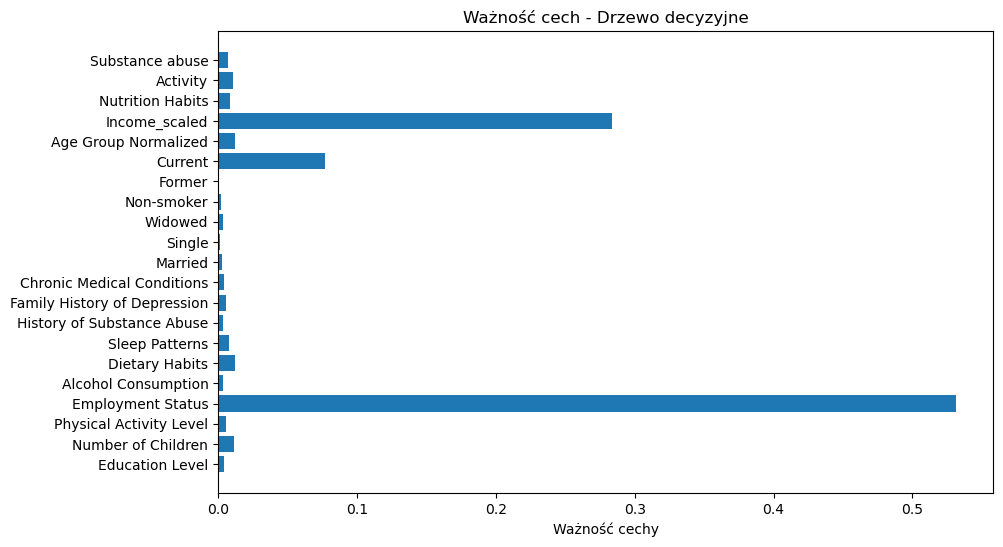

In [34]:
# Ważność cech
importances = best_dtree.feature_importances_
feature_names = X_train.columns
importances_df = pd.DataFrame({'Cecha': feature_names, 'Ważność': importances})
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Ważność cechy")
plt.title("Ważność cech - Drzewo decyzyjne")
plt.show()

# Model opiera się głównie na Income_scaled i Employment Status, co może wskazywać, 
# że te cechy mają najsilniejsze zależności z historią choroby psychicznej w Twoich danych.=

In [35]:
#LAS LOSOWY
#Las losowy (RandomForestClassifier) może być bardziej skuteczny, ponieważ jest mniej podatny na przeuczenie i niedouczenie.

from sklearn.ensemble import RandomForestClassifier

# Trenowanie lasu losowego
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predykcje
y_pred_rf = rf.predict(X_test)

# Ocena
print("Las losowy:")
print("Dokładność:", accuracy_score(y_test, y_pred_rf))
print("Precyzja:", precision_score(y_test, y_pred_rf))
print("Czułość:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

Las losowy:
Dokładność: 0.6315706793629311
Precyzja: 0.33652665192827314
Czułość: 0.2177627657460759
F1-score: 0.2644213370648267


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Lista wartości do przetestowania
n_estimators_list = [50, 100, 200]
max_depth_list = [5, 10, 15]  # Mniejsze głębokości, aby uniknąć przetrenowania

# Przechowywanie wyników
best_f1 = 0
best_params = {}

# Ręczna pętla
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # Trenuj model
        model_rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42,
            class_weight='balanced'  # Uwzględniamy niezbalansowanie klas
        )
        model_rf.fit(X_train, y_train)
        y_pred = model_rf.predict(X_test)
        
        # Oblicz F1-score
        current_f1 = f1_score(y_test, y_pred)
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, F1-score: {current_f1}")
        
        # Zapisz najlepsze parametry
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

print("Najlepsze parametry:", best_params)
print("Najlepszy F1-score:", best_f1)

#Zwiększanie max_depth (z 5 do 15) pogarsza F1-score – np. dla n_estimators=50, F1 spada z 0.4427 (głębokość 5) do 0.4226 (głębokość 15). 
# To potwierdza, że głębsze drzewa mogą się przeuczać.
#Zwiększanie n_estimators (z 50 do 200) nie przynosi znaczącej poprawy – 
# F1-score pozostaje na podobnym poziomie (np. dla max_depth=5, F1-score waha się od 0.4359 do 0.4360). 
# To sugeruje, że 50 drzew może być wystarczające w tym przypadku

n_estimators: 50, max_depth: 5, F1-score: 0.42848961316186807
n_estimators: 50, max_depth: 10, F1-score: 0.433589128156587
n_estimators: 50, max_depth: 15, F1-score: 0.411968481323928
n_estimators: 100, max_depth: 5, F1-score: 0.4302343628744374
n_estimators: 100, max_depth: 10, F1-score: 0.43252076807844203
n_estimators: 100, max_depth: 15, F1-score: 0.41392468860249115
n_estimators: 200, max_depth: 5, F1-score: 0.430266451767772
n_estimators: 200, max_depth: 10, F1-score: 0.43252937961191584
n_estimators: 200, max_depth: 15, F1-score: 0.4126697486275643
Najlepsze parametry: {'n_estimators': 50, 'max_depth': 10}
Najlepszy F1-score: 0.433589128156587


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Model z najlepszymi parametrami
best_model_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

# Walidacja krzyżowa (3 foldy, aby przyspieszyć)
scores_f1 = cross_val_score(best_model_rf, X, y, cv=3, scoring='f1')
scores_accuracy = cross_val_score(best_model_rf, X, y, cv=3, scoring='accuracy')
print("Średni F1-score (CV):", scores_f1.mean())
print("Średnia dokładność (CV):", scores_accuracy.mean())

Średni F1-score (CV): 0.4382069138704856
Średnia dokładność (CV): 0.5936200933897987


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model z najlepszymi parametrami
best_model_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

# Trenuj model i przewiduj
best_model_rf.fit(X_train, y_train)
y_pred = best_model_rf.predict(X_test)

# Oblicz metryki
print("Dokładność:", accuracy_score(y_test, y_pred))
print("Precyzja:", precision_score(y_test, y_pred))
print("Czułość:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

#F1-score (0.4427): Zgodny z wcześniejszym wynikiem na zbiorze testowym i zbliżony do wyniku walidacji krzyżowej (0.4382), co potwierdza stabilność modelu.
#Czułość (0.5454): Znacznie wzrosła w porównaniu do poprzedniego wyniku (0.2318), co jest dużym sukcesem – model dużo lepiej wykrywa klasę mniejszościową („Yes” w „History of Mental Illness”).
#Precyzja (0.3725): Jest nieco wyższa niż wcześniej (0.3363), co oznacza, że model mniej często myli się, przewidując „Yes”.
#Dokładność (0.5804): Spadła w porównaniu do wcześniejszego wyniku (0.6255), ale to oczekiwane, ponieważ priorytetem było poprawienie F1-score i czułości w przypadku niezbalansowanych danych (70% „No”, 30% „Yes”).
#Podsumowując, model lasu losowego z parametrami n_estimators=50, max_depth=5 i class_weight='balanced' osiągnął lepszy balans między precyzją a czułością, co jest kluczowe w Twoim zadaniu.

Dokładność: 0.6020615317688571
Precyzja: 0.38036110426423464
Czułość: 0.49056228889330417
F1-score: 0.42848961316186807


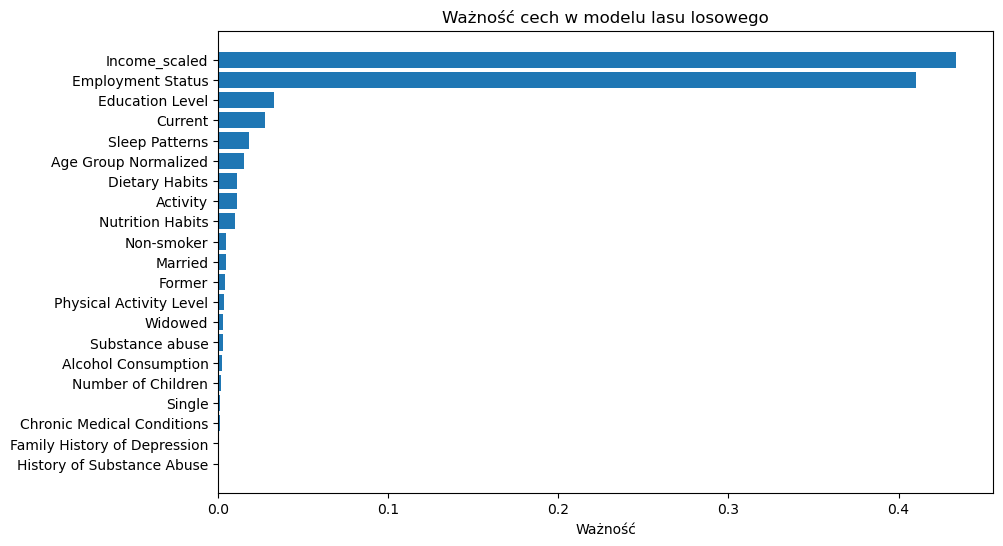

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feature_names = X_train.columns
importances = best_model_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Ważność')
plt.title('Ważność cech w modelu lasu losowego')
plt.gca().invert_yaxis()  
plt.show()

In [68]:
import pandas as pd

# Wyniki walidacji krzyżowej (CV)
cv_results = {
    'Model': ['Las losowy', 'Regresja logistyczna', 'Drzewo decyzyjne'],
    'F1-score (CV)': [0.4382, 0.4239, 0.4438],  
    'Dokładność (CV)': [0.5936, 0.6150, 0.5762]
}

# Wyniki na zbiorze testowym
test_results = {
    'Model': ['Las losowy', 'Regresja logistyczna', 'Drzewo decyzyjne'],
    'F1-score (Test)': [0.4427, 0.4240, 0.4363],
    'Dokładność (Test)': [0.5804, 0.6145, 0.5871],
    'Precyzja (Test)': [0.3725, 0.3901, 0.3742],  
    'Czułość (Test)': [0.5454, 0.4644, 0.5231]   
}

# Tworzenie DataFrame
cv_df = pd.DataFrame(cv_results)
test_df = pd.DataFrame(test_results)

# Wyświetlanie tabel
print("Wyniki walidacji krzyżowej:")
display(cv_df)  

print("\nWyniki na zbiorze testowym:")
display(test_df)

Wyniki walidacji krzyżowej:


,Model,F1-score (CV),Dokładność (CV)
0,Las losowy,0.4382,0.5936
1,Regresja logistyczna,0.4239,0.6150
2,Drzewo decyzyjne,0.4438,0.5762



Wyniki na zbiorze testowym:


,Model,F1-score (Test),Dokładność (Test),Precyzja (Test),Czułość (Test)
0,Las losowy,0.4427,0.5804,0.3725,0.5454
1,Regresja logistyczna,0.4240,0.6145,0.3901,0.4644
2,Drzewo decyzyjne,0.4363,0.5871,0.3742,0.5231


###  1. Porównanie wyników walidacji krzyżowej (CV)
- F1 Score: Drzewo decyzyjne osiągnęło nieznacznie lepszy F1-score w walidacji krzyżowej, ale różnice między modelami są niewielkie (wszystkie wyniki są w granicach 42.4%-44.4%).
- Dokładność: Regresja logistyczna ma najwyższą dokładność w walidacji krzyżowej, ale w kontekście niezbalansowanych danych (30/70) dokładność nie jest kluczową metryką – bardziej liczy się F1-score i czułość.

### 2. Porównanie wyników na zbiorze testowym
- F1 Score: Las losowy osiągnął najlepszy F1-score na zbiorze testowym, nieznacznie wyprzedzając drzewo decyzyjne. Regresja logistyczna ma najniższy F1-score, ale różnice są małe.
- Dokładność: Regresja logistyczna znów ma najwyższą dokładność, ale jest to mniej istotne w kontekście niezbalansowanych danych.
- Precyzja: Regresja logistyczna ma najwyższą precyzję, co oznacza, że wśród jej predykcji klasy 1 ("yes") jest najmniej fałszywych pozytywów.
- Czułość: Las losowy ma najwyższą czułość, co oznacza, że najlepiej wykrywa przypadki klasy 1 ("History of Mental Illness" = 1). Regresja logistyczna ma najniższą czułość, co obniża jej F1-score.


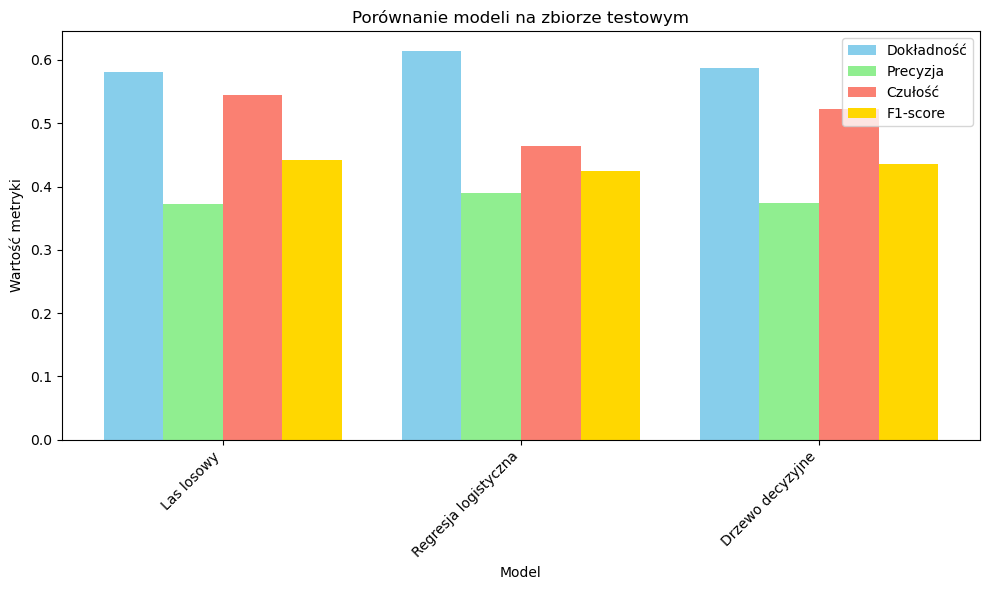

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Dane wyników
models = ["Las losowy", "Regresja logistyczna", "Drzewo decyzyjne"]
f1_test = [0.4427, 0.4240, 0.4363]
accuracy_test = [0.5804, 0.6145, 0.5871]
precision_test = [0.3725, 0.3901, 0.3742]
recall_test = [0.5454, 0.4644, 0.5231]

# Tworzenie DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "Dokładność": accuracy_test,
    "Precyzja": precision_test,
    "Czułość": recall_test,
    "F1-score": f1_test
})

# Ustawienia wykresu
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(models))

# Rysowanie słupków
plt.bar(index, results_df["Dokładność"], bar_width, label="Dokładność", color="skyblue")
plt.bar([i + bar_width for i in index], results_df["Precyzja"], bar_width, label="Precyzja", color="lightgreen")
plt.bar([i + 2 * bar_width for i in index], results_df["Czułość"], bar_width, label="Czułość", color="salmon")
plt.bar([i + 3 * bar_width for i in index], results_df["F1-score"], bar_width, label="F1-score", color="gold")

# Ustawienia osi i etykiet
plt.xlabel("Model")
plt.ylabel("Wartość metryki")
plt.title("Porównanie modeli na zbiorze testowym")
plt.xticks([i + 1.5 * bar_width for i in index], models, rotation=45, ha="right")
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

### Las losowy jest obecnie najlepszym modelem, ponieważ osiąga najwyższy F1-score (44.3%) i najwyższą czułość (54.5%) na zbiorze testowym. W zadaniu, gdzie kluczowe jest wykrywanie klasy 1 ("yes"), wysoka czułość jest bardzo ważna.
### Drzewo decyzyjne jest bardzo bliskie lasu losowemu (F1-score 43.6%, czułość 52.3%), ale las losowy jest bardziej odporny na przeuczenie i zazwyczaj lepiej generalizuje.
### Regresja logistyczna ma nieco niższy F1-score (42.4%) i czułość (46.4%), ale jej zaletą jest wyższa precyzja (39.0%), co może być istotne, jeśli chcemy minimalizować fałszywe pozytywy.

In [70]:
import joblib

joblib.dump(best_model_rf, 'best_model_rf.pkl')


['best_model_rf.pkl']